In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Make sure to replace the path with the path to your specific file
file_path = '/content/drive/MyDrive/data/Data.csv'
df = pd.read_csv(file_path)

df

,annotation_id,annotator,created_at,id,lead_time,sentiment,text,updated_at
0,7,1,2023-12-02T20:54:17.862001Z,1,1.765,not offensive,hemen cep bank yapıyorum ozaman siteye çökücez...,2023-12-02T20:54:17.862001Z
1,8,1,2023-12-02T20:54:21.436956Z,2,1.152,profanity,geçmiş olsun fenerin anasini sik,2023-12-02T20:54:21.436956Z
2,9,1,2023-12-02T20:54:28.418708Z,3,1.156,not offensive,migros adet bilet var ilgilenen varsa yazsın,2023-12-02T20:54:28.418708Z
3,6,1,2023-12-02T20:53:50.135713Z,4,1.339,not offensive,çok hızlı gidenlere yavaş demek için geride du...,2023-12-02T20:53:50.135713Z
4,5,1,2023-12-02T20:53:18.031513Z,5,45.906,not offensive,nolu ile fetöcü öğrencilerin tüm borcu silindi...,2023-12-02T20:53:37.477348Z
...,...,...,...,...,...,...,...,...
81796,25285,1,2024-01-04T09:42:36.493016Z,25285,1.590,NotOffensive,yurtdışına açık bi alan düşünüyorsan uluslarar...,2024-01-04T09:42:36.493016Z
81797,25286,1,2024-01-04T09:42:40.478245Z,25286,3.334,NotOffensive,hastanedekiler ismini yağmur koy demişler aney...,2024-01-04T09:42:40.478245Z
81798,25287,1,2024-01-04T09:42:42.117262Z,25287,1.019,NotOffensive,yine başkası üzülmesin diye kendimi üzüyorum,2024-01-04T09:42:42.117262Z
81799,25288,1,2024-01-04T09:42:51.022365Z,25288,8.278,NotOffensive,mardinde vatandaşlar teröre tepki göstermek ve...,2024-01-04T09:42:51.022365Z


In [ ]:
df['sentiment'].unique()

array(['not offensive', 'profanity', 'insult',
       '{"choices":["profanity","insult"]}', 'racist', 'sexist', nan,
       '{"choices":["racist","profanity"]}',
       '{"choices":["sexist","profanity"]}',
       '{"choices":["racist","profanity","insult"]}',
       '{"choices":["racist","insult"]}', 'Profanity',
       '{"choices":["Racist","Profanity"]}', 'Insult', 'Not-Offensive',
       '{"choices":["Sexist","Profanity"]}', 'Racist',
       '{"choices":["Sexist","Racist","Profanity"]}',
       '{"choices":["Sexist","Insult"]}', 'Sexist',
       '{"choices":["Racist","Insult"]}',
       '{"choices":["Not-Offensive","Insult"]}', 'Not offensive',
       '{"choices":["Racist","Sexist","Profanity"]}',
       '{"choices":["sexist","insult"]}',
       '{"choices":["not offensive","racist"]}',
       '{"choices":["racist","sexist"]}', 'NotOffensive',
       '{"choices":["Profanity","Insult"]}',
       '{"choices":["Racist","Sexist"]}',
       '{"choices":["Racist","Profanity","Insult"]}',

In [ ]:
def preprocess(df):

  df = df[['text','sentiment']]
  texts = df['text']

  # Check for duplicates and print them
  print(df[texts.isin(texts[texts.duplicated()])].sort_values("text"))

  # drop same texts
  df.drop_duplicates(subset = ['text'], inplace = True)

  def preprocess_sentiment(df):
    df['sentiment'] = df['sentiment'].str.lower()
    df['sentiment'] = df['sentiment'].map({'sexist': 'sexist', 'insult': 'insult', 'racist': 'racist', 'profanity': 'profanity'
    , 'not-offensive': 'notoffensive', "notoffensive": "notoffensive", "not offensive" : "notoffensive","ınsult": "insult"})
      # Create dummy columns without dropping any columns
    df_dummies = pd.get_dummies(df['sentiment'], drop_first=False)

    # Concatenate the dummy columns with the original DataFrame
    df = pd.concat([df, df_dummies], axis=1)
    df = df.dropna(subset=['sentiment'])
    df.drop(columns = ['sentiment'],inplace = True)
    return df

  df = preprocess_sentiment(df.copy())

  return df
  # df.to_csv("/content/drive/MyDrive/data/Preprocessed_data.csv", index=False)
df = preprocess(df)

                                                    text      sentiment
15159  a haber chpli avukat dış mihraklara şifreli me...  Not-Offensive
81255  a haber chpli avukat dış mihraklara şifreli me...   NotOffensive
23597                          a haber günah keçisi oldu  Not-Offensive
67378                          a haber günah keçisi oldu   NotOffensive
7615                           a haber günah keçisi oldu  not offensive
...                                                  ...            ...
31393  şüphe duyuyorsan yalnız yürüyeceksin o yolu ta...  Not offensive
21858  şüphe etmeden boş boş yaşamayın hayatınızda bi...  Not-Offensive
70148  şüphe etmeden boş boş yaşamayın hayatınızda bi...   NotOffensive
56753  şırdan dışında sakatat tüketmiyorum hatta bund...   NotOffensive
6420   şırdan dışında sakatat tüketmiyorum hatta bund...  not offensive

[38350 rows x 2 columns]


<ipython-input-3-e4ffbc5c6544>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset = ['text'], inplace = True)


In [ ]:
df

,text,insult,notoffensive,profanity,racist,sexist
0,hemen cep bank yapıyorum ozaman siteye çökücez...,0,1,0,0,0
1,geçmiş olsun fenerin anasini sik,0,0,1,0,0
2,migros adet bilet var ilgilenen varsa yazsın,0,1,0,0,0
3,çok hızlı gidenlere yavaş demek için geride du...,0,1,0,0,0
4,nolu ile fetöcü öğrencilerin tüm borcu silindi...,0,1,0,0,0
...,...,...,...,...,...,...
81792,evet o zamanda söylemiştin ben çıkıyorum diye,0,1,0,0,0
81793,arap levhası bizi itmese bu depremler hiç olma...,0,0,0,1,0
81795,diyorum ki aileleri bunların başını zorla başı...,0,1,0,0,0
81797,hastanedekiler ismini yağmur koy demişler aney...,0,1,0,0,0


In [ ]:
# Remove rows with less than 5 characters
df = df[df['text'].str.len() > 5]

# Remove rows with only punctuation
df = df[~df['text'].str.contains(r'^[\W_]+$')]

# Remove rows with only whitespace
df = df[~df['text'].str.isspace()]

# Remove rows with only digits
df = df[~df['text'].str.isdigit()]


In [ ]:
# Calculate the length of each text string
df['text_length'] = df['text'].str.len()

# Find the most frequent words in the 'text' column
from collections import Counter
words = Counter()
for text in df['text']:
    words.update(text.split())
most_frequent_words = words.most_common(10)
print(most_frequent_words)

[('bir', 13007), ('bu', 11658), ('ve', 9127), ('ne', 6275), ('de', 6098), ('da', 5346), ('için', 5021), ('çok', 4801), ('@USER', 4545), ('o', 4190)]


In [ ]:
df

,text,insult,notoffensive,profanity,racist,sexist,text_length
0,hemen cep bank yapıyorum ozaman siteye çökücez...,0,1,0,0,0,60
1,geçmiş olsun fenerin anasini sik,0,0,1,0,0,32
2,migros adet bilet var ilgilenen varsa yazsın,0,1,0,0,0,44
3,çok hızlı gidenlere yavaş demek için geride du...,0,1,0,0,0,53
4,nolu ile fetöcü öğrencilerin tüm borcu silindi...,0,1,0,0,0,137
...,...,...,...,...,...,...,...
81792,evet o zamanda söylemiştin ben çıkıyorum diye,0,1,0,0,0,45
81793,arap levhası bizi itmese bu depremler hiç olma...,0,0,0,1,0,74
81795,diyorum ki aileleri bunların başını zorla başı...,0,1,0,0,0,270
81797,hastanedekiler ismini yağmur koy demişler aney...,0,1,0,0,0,209


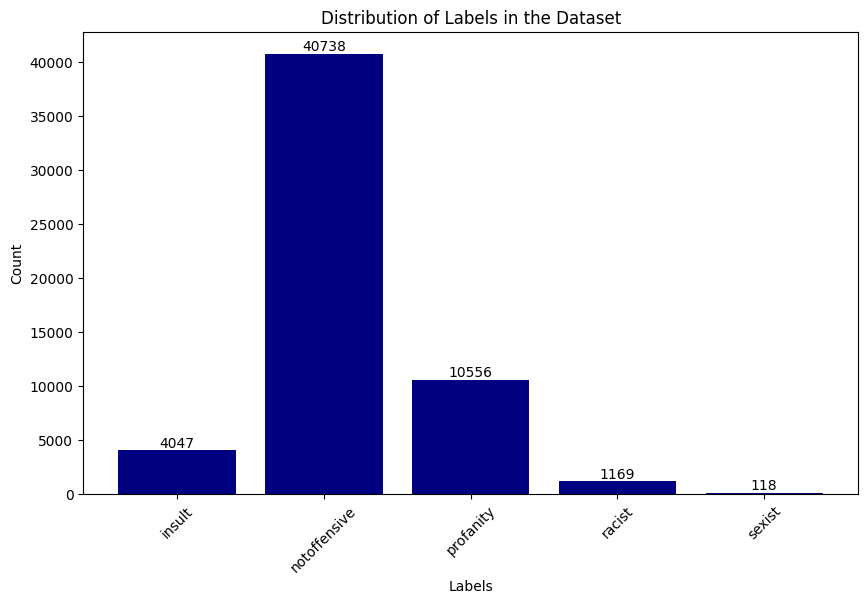

In [ ]:
df_copy = pd.DataFrame({'labels': ['insult', 'notoffensive', 'profanity', 'racist', 'sexist'],
                   'count': [df['insult'].sum(), df['notoffensive'].sum(), df['profanity'].sum(), df['racist'].sum(), df['sexist'].sum()]})

# Plot the distribution of labels
plt.figure(figsize=(10, 6))
plt.bar(df_copy['labels'], df_copy['count'], color='navy')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels in the Dataset')
plt.xticks(rotation=45)

for i, value in enumerate(df_copy['count']):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

In [ ]:
import re

def remove_mentions(text):
  """
  Removes mentions (@username) from a text and returns the removed mentions.

  Args:
    text: The text to process.

  Returns:
    A list of removed mentions.
  """
  mentions = re.findall(r"@\S+", text)
  for mention in mentions:
    text = text.replace(mention, "")
  return mentions

# Apply the function to the "text" column
removed_mentions = []
for text in df["text"]:
  removed_mentions.extend(remove_mentions(text))

# Print the removed mentions
print("Removed mentions:", removed_mentions)

Removed mentions: ['@alihydrdemir02', '@suleymansoylu', '@stravlikos', '@hacikodernek', '@mardin_dkmp', '@MardinBuyukshr', '@belkiziltepe', '@KiziltepeKymlk', '@TC_icisleri', '@hazarhancapan', '@Dextranxd', '@Trabzonspor', '@TamerBu57024742', '@Gkdeniz83085132', '@siyasett31', '@ogrencicamiasi', '@atlaspp', '@Bobocan59464826', '@zisansarp', '@ekrem_imamoglu', '@AmedElih', '@allahdiyencilek', '@hypebilgi', '@Trmyd', '@istgundem', '@ibbBeyazmasa', '@ekrem_imamoglu', '@kilicdarogluk', '@herkesicinCHP', '@HilbeAgiri', '@gkbrhkn', '@Mustafak61', '@gazali_a1', '@ErcVatansever', '@marindekim', '@Kuprat_53', '@fikret_bila', '@fikret_bila', '@UKRinTR', '@muzminadamm', '@orhanikinciler', '@AGDSalihTURHAN', '@Doruk___Ulusoy', '@atheologist1', '@Frayon16', '@hicetikdegill', '@Deniz83alrrr', '@Ayseeszzz11', '@callousalfa', '@RealDiyojen', '@Furkankozinoglu', '@lordcyborgg', '@_Poseidon0', '@selimtheyellow', '@nihatcanos', '@poyrazturq', '@bbosports', '@k9iojorge', '@AbdurrahmanOuz3', '@avcemilcicek

In [ ]:
def remove_mentions(text):
  """
  Removes mentions (@username) from a text.

  Args:
    text: The text to process.

  Returns:
    The text with mentions removed.
  """
  return re.sub(r"@\S+", "", text)

# Apply the function to the "text" column
df["text"] = df["text"].apply(remove_mentions)

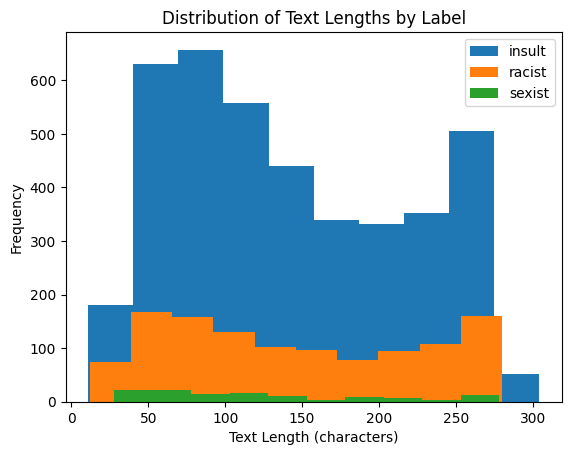

In [ ]:
# Get the label names
label_names = ["insult","racist","sexist"]

# Group the data by label names
grouped_df = {}
for label in label_names:
    grouped_df[label] = df[df[label] == 1]["text_length"]

# Plot the distribution for each label
for label, group in grouped_df.items():
    plt.hist(group, label=label)

plt.xlabel("Text Length (characters)")
plt.ylabel("Frequency")
plt.title("Distribution of Text Lengths by Label")
plt.legend()
plt.show()

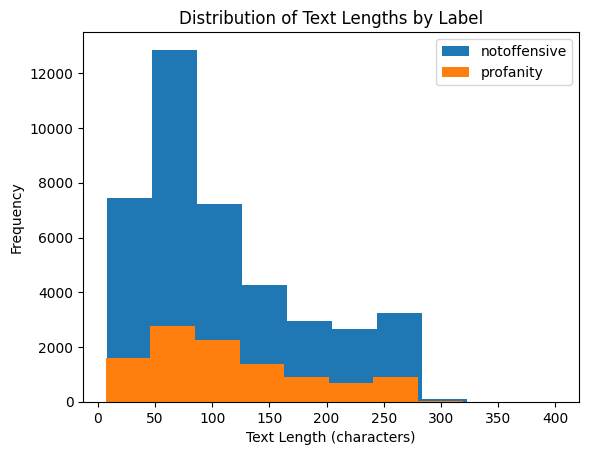

In [ ]:
# Get the label names
label_names = ["notoffensive","profanity"]

# Group the data by label names
grouped_df = {}
for label in label_names:
    grouped_df[label] = df[df[label] == 1]["text_length"]

# Plot the distribution for each label
for label, group in grouped_df.items():
    plt.hist(group, label=label)

plt.xlabel("Text Length (characters)")
plt.ylabel("Frequency")
plt.title("Distribution of Text Lengths by Label")
plt.legend()
plt.show()

In [ ]:
df

,text,insult,notoffensive,profanity,racist,sexist,text_length
0,hemen cep bank yapıyorum ozaman siteye çökücez...,0,1,0,0,0,60
1,geçmiş olsun fenerin anasini sik,0,0,1,0,0,32
2,migros adet bilet var ilgilenen varsa yazsın,0,1,0,0,0,44
3,çok hızlı gidenlere yavaş demek için geride du...,0,1,0,0,0,53
4,nolu ile fetöcü öğrencilerin tüm borcu silindi...,0,1,0,0,0,137
...,...,...,...,...,...,...,...
81792,evet o zamanda söylemiştin ben çıkıyorum diye,0,1,0,0,0,45
81793,arap levhası bizi itmese bu depremler hiç olma...,0,0,0,1,0,74
81795,diyorum ki aileleri bunların başını zorla başı...,0,1,0,0,0,270
81797,hastanedekiler ismini yağmur koy demişler aney...,0,1,0,0,0,209


In [ ]:
# prompt: Using dataframe df: find # symbol

df['text'].str.contains('#').sum()


588

In [ ]:
df.iloc[1]

text            geçmiş olsun fenerin anasini sik
insult                                         0
notoffensive                                   0
profanity                                      1
racist                                         0
sexist                                         0
text_length                                   32
Name: 1, dtype: object

In [ ]:
df.to_csv("/content/drive/MyDrive/data/Preprocessed_data.csv", index=False)